In [1]:
%matplotlib inline
import pandas as pd
import os
import matplotlib as plt
import seaborn as sns
import numpy as np
from IPython.core.display import Image

C:\Anaconda3\lib\site-packages\matplotlib\__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [6]:
#custom style HTML output

from IPython.core.display import HTML

csspath1 = r'C:\COURSERA\PYCON2015_TUTORIALS\Brandon Rhodes - Pandas From The Ground Up - PyCon 2015\style-table.css'
csspath2 = r'C:\COURSERA\PYCON2015_TUTORIALS\Brandon Rhodes - Pandas From The Ground Up - PyCon 2015\style-notebook.css'

css = open(csspath1).read() + open(csspath2).read()
HTML('<style>{}</style>'.format(css))

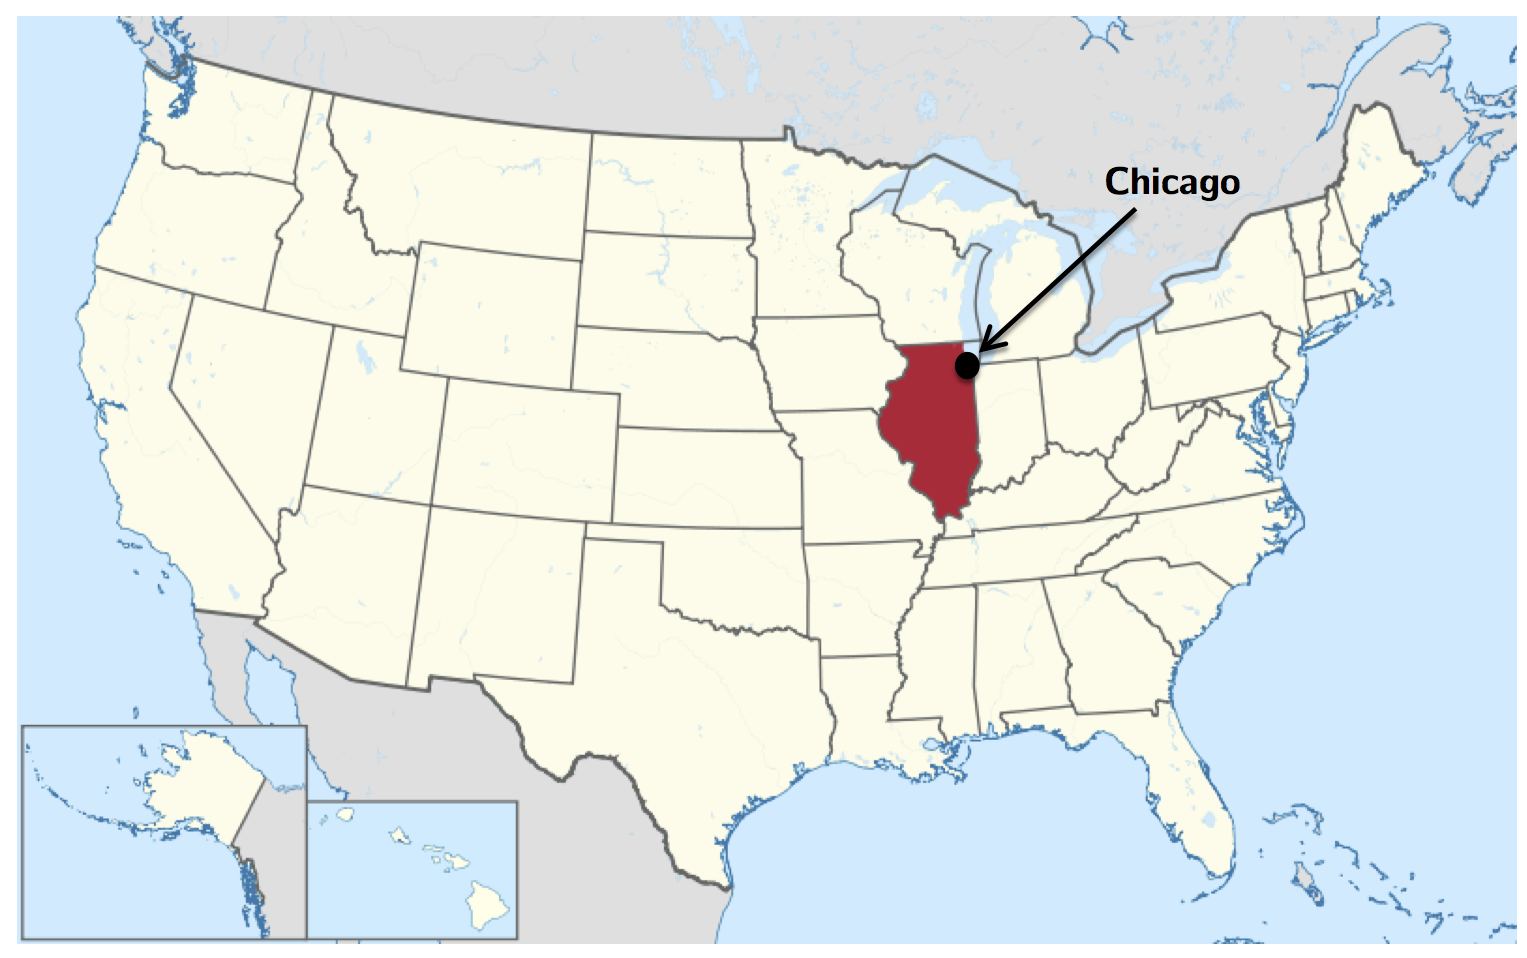

In [2]:
Image('https://d37djvu3ytnwxt.cloudfront.net/asset-v1:MITx+15.071x_3+1T2016+type@asset+block/ChicagoMap.png')

In [3]:
# Eead in data

mvt = pd.read_csv('DATA\mvtWeek1.csv',dtype=object)

In [12]:
# How many rows of data (observations) and variables are in this dataset?

mvt.shape

(191641, 11)

In [16]:
# What is the maximum value of the variable "ID"?

mvt.ID.astype(int).max()

9181151

In [15]:
# What is the minimum value of the variable "Beat"?

mvt.Beat.astype(int).min()

111

In [22]:
# How many observations have value TRUE in the Arrest 
# variable (this is the number of crimes for which an arrest was made)?

mvt.Arrest.value_counts()

FALSE    176105
TRUE      15536
Name: Arrest, dtype: int64

In [25]:
# How many observations have a LocationDescription value of ALLEY?

mvt.LocationDescription.value_counts()['ALLEY']

2308

In [28]:
# convert mvt.Date to datetime object

mvt.Date = pd.to_datetime(mvt.Date)

In [35]:
# For what proportion of motor vehicle thefts in 2001 was an arrest made?

mvt[mvt.Date.dt.year == 2001]['Arrest'].value_counts(normalize=True)

FALSE    0.895883
TRUE     0.104117
Name: Arrest, dtype: float64

In [36]:
# For what proportion of motor vehicle thefts in 2007 was an arrest made?

mvt[mvt.Date.dt.year == 2007]['Arrest'].value_counts(normalize=True)

FALSE    0.915126
TRUE     0.084874
Name: Arrest, dtype: float64

In [37]:
# For what proportion of motor vehicle thefts in 2012 was an arrest made?

mvt[mvt.Date.dt.year == 2012]['Arrest'].value_counts(normalize=True)

FALSE    0.960971
TRUE     0.039029
Name: Arrest, dtype: float64

In [45]:
# Which locations are the top five locations for motor vehicle thefts, 
# excluding the "Other" category? You should select 5 of the following options.

mvt.LocationDescription[mvt.LocationDescription != 'OTHER'].value_counts().head(5)

STREET                            156564
PARKING LOT/GARAGE(NON.RESID.)     14852
ALLEY                               2308
GAS STATION                         2111
DRIVEWAY - RESIDENTIAL              1675
Name: LocationDescription, dtype: int64

In [55]:
# Create a subset of your data, only taking observations for 
# which the theft happened in one of these five locations, 
# and call this new data set "top5".

top5locations = mvt.LocationDescription[mvt.LocationDescription != 'OTHER'].value_counts().head(5).index

top5 = mvt[mvt.LocationDescription.isin(top5locations)]
top5.head()

,ID,Date,LocationDescription,Arrest,Domestic,Beat,District,CommunityArea,Year,Latitude,Longitude
0,8951354,2012-12-31 23:15:00,STREET,FALSE,FALSE,623,6,69,2012,41.75628399,-87.62164472
1,8951141,2012-12-31 22:00:00,STREET,FALSE,FALSE,1213,12,24,2012,41.89878849,-87.66130317
3,8952223,2012-12-31 22:00:00,STREET,FALSE,FALSE,724,7,67,2012,41.76932868,-87.65772562
4,8951608,2012-12-31 21:30:00,STREET,FALSE,FALSE,211,2,35,2012,41.83756759,-87.62176133
5,8950793,2012-12-31 20:30:00,STREET,TRUE,FALSE,2521,25,19,2012,41.92856081,-87.75399811


In [56]:
# How many observations are in Top5?

top5.shape

(177510, 11)

In [66]:
# TO SOLVE

# One of the locations has a much higher arrest rate than the other locations. 
# Which is it? 

pd.crosstab(top5.LocationDescription,top5.Arrest)

Arrest,FALSE,TRUE
LocationDescription,,
ALLEY,2059,249
DRIVEWAY - RESIDENTIAL,1543,132
GAS STATION,1672,439
PARKING LOT/GARAGE(NON.RESID.),13249,1603
STREET,144969,11595


In [80]:
# On which day of the week do the most motor vehicle thefts at gas stations happen?
# On which day of the week do the least motor vehicle thefts at gas stations happen?

top5[top5.LocationDescription == 'DRIVEWAY - RESIDENTIAL']['Date'].dt.weekday.value_counts(normalize=True).sort_values()

5    0.120597
6    0.131940
2    0.139701
1    0.145075
0    0.152239
4    0.153433
3    0.157015
Name: Date, dtype: float64